# Redes neuronais

**Imports**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

**Carregar dataset**

In [2]:
training_data = pd.read_csv("training_data.csv", encoding='latin-1')
test_data = pd.read_csv("test_data.csv", encoding='latin-1')

**Verificar outliers**

<AxesSubplot:>

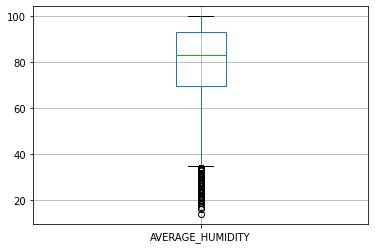

In [3]:
training_data.boxplot(column='AVERAGE_HUMIDITY')

<AxesSubplot:>

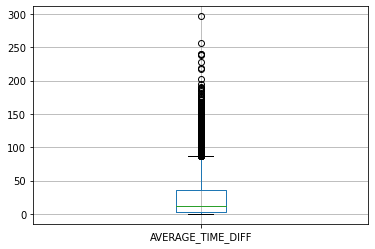

In [4]:
training_data.boxplot(column='AVERAGE_TIME_DIFF')

In [5]:
#REMOVER OUTLIERS
from scipy.stats.mstats import winsorize
training_data['AVERAGE_FREE_FLOW_SPEED']=winsorize(training_data['AVERAGE_FREE_FLOW_SPEED'],(0.01,0.02))
training_data['AVERAGE_TIME_DIFF']=winsorize(training_data['AVERAGE_TIME_DIFF'],(0.01,0.01))
training_data['AVERAGE_FREE_FLOW_TIME']=winsorize(training_data['AVERAGE_FREE_FLOW_TIME'],(0.02,0.02))
training_data['AVERAGE_TEMPERATURE']=winsorize(training_data['AVERAGE_TEMPERATURE'],(0.01,0.02))
training_data['AVERAGE_ATMOSP_PRESSURE']=winsorize(training_data['AVERAGE_ATMOSP_PRESSURE'],(0.04,0.02))
training_data['AVERAGE_HUMIDITY']=winsorize(training_data['AVERAGE_HUMIDITY'],(0.03,0.01))
training_data['AVERAGE_WIND_SPEED']=winsorize(training_data['AVERAGE_WIND_SPEED'],(0.01,0.02))

<AxesSubplot:>

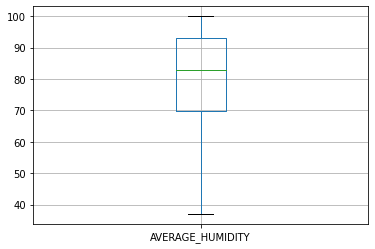

In [6]:
training_data.boxplot(column='AVERAGE_HUMIDITY')

<AxesSubplot:>

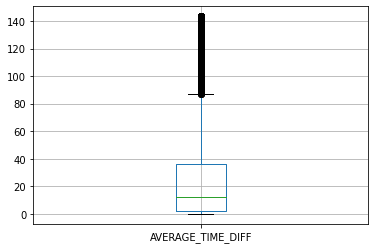

In [7]:
training_data.boxplot(column='AVERAGE_TIME_DIFF')

**Preparar dataset**

In [8]:
'''
Preparar o dataset
'''
#City name é sempre porto logo pode-se fazer drop
#Drop
training_data = training_data.drop(['city_name'], axis=1)
#Average percipitation é sempre 0 logo pode-se fazer drop
training_data = training_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

**Normalizar dataset**

In [9]:
#Precisamos de escalar certos valores para 0-1
training_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
training_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
training_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
training_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
training_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
training_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_HUMIDITY']).reshape(-1,1))
training_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(training_data['AVERAGE_WIND_SPEED']).reshape(-1,1))

training_data.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN


**Criar colunas com intervalos de horas**

In [10]:
dfdate= pd.to_datetime(training_data['record_date'])
#training_data['record_date'] =  pd.to_datetime(training_data['record_date'], infer_datetime_format=True)
# define the bins
bins = [0, 7, 11, 14, 17, 19, 21, 24]

# add custom labels if desired
labels = ['00:00-06:59', '07:00-10:59', '11:00-13:59', '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59']

# add the bins to the dataframe
training_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)
dfdate = pd.to_datetime(test_data['record_date'])
test_data['Time Bin'] = pd.cut(dfdate.dt.hour, bins, labels=labels, right=False)

def ismeia(cols):
    TimeBin=cols
    if TimeBin==labels[0]:
        return 1
    else:
        return 0
    
def issete(cols):
    TimeBin=cols
    if TimeBin==labels[1]:
        return 1
    else:
        return 0

def isonze(cols):
    TimeBin=cols
    if TimeBin==labels[2]:
        return 1
    else:
        return 0
    
def isquatorze(cols):
    TimeBin=cols
    if TimeBin==labels[3]:
        return 1
    else:
        return 0
    
def isdessasete(cols):
    TimeBin=cols
    if TimeBin==labels[4]:
        return 1
    else:
        return 0

def isdezanove(cols):
    TimeBin=cols
    if TimeBin==labels[5]:
        return 1
    else:
        return 0
    
def isvinteum(cols):
    TimeBin=cols
    if TimeBin==labels[6]:
        return 1
    else:
        return 0
    
training_data[labels[0]] = training_data['Time Bin'].apply(ismeia)
training_data[labels[1]] = training_data['Time Bin'].apply(issete)
training_data[labels[2]] = training_data['Time Bin'].apply(isonze)
training_data[labels[3]] = training_data['Time Bin'].apply(isquatorze)
training_data[labels[4]] = training_data['Time Bin'].apply(isdessasete)
training_data[labels[5]] = training_data['Time Bin'].apply(isdezanove)
training_data[labels[6]] = training_data['Time Bin'].apply(isvinteum)

training_data=training_data.drop('Time Bin',axis=1)

test_data[labels[0]] = test_data['Time Bin'].apply(ismeia)
test_data[labels[1]] = test_data['Time Bin'].apply(issete)
test_data[labels[2]] = test_data['Time Bin'].apply(isonze)
test_data[labels[3]] = test_data['Time Bin'].apply(isquatorze)
test_data[labels[4]] = test_data['Time Bin'].apply(isdessasete)
test_data[labels[5]] = test_data['Time Bin'].apply(isdezanove)
test_data[labels[6]] = test_data['Time Bin'].apply(isvinteum)


test_data=test_data.drop('Time Bin',axis=1)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN,0,1,0,0,0,0,0
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN,0,0,0,1,0,0,0
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN,0,0,0,1,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN,0,0,1,0,0,0,0
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,LIGHT,0.208333,1.000000,0.539683,0.500,céu claro,NaN,0,1,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,LIGHT,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,DARK,0.458333,0.583333,0.031746,0.500,céu claro,NaN,1,0,0,0,0,0,0
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,DARK,0.166667,0.500000,0.698413,0.125,algumas nuvens,NaN,1,0,0,0,0,0,0


**Criar coluna para dias da semana ou fim-de-semana**

In [11]:
def isweekday(cols):
    dayofweek=cols
    if dayofweek=='Saturday' or dayofweek=='Sunday':
        return 0
    else:
        return 1

dfdate= pd.to_datetime(training_data['record_date'])
asd= dfdate.dt.day_name()
training_data['IsDayOfWeek'] = asd.apply(isweekday)

dfdate= pd.to_datetime(test_data['record_date'])
asd= dfdate.dt.day_name()
test_data['IsDayOfWeek'] = asd.apply(isweekday)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,LIGHT,0.458333,0.541667,1.000000,0.375,NaN,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,LIGHT,0.708333,0.625000,0.253968,0.625,céu claro,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,LIGHT,0.916667,0.333333,0.380952,0.500,NaN,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,LIGHT,0.583333,0.791667,0.174603,0.500,céu claro,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,LIGHT,0.458333,0.083333,0.714286,1.000,NaN,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,LIGHT,0.208333,1.000000,0.539683,0.500,céu claro,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,LIGHT,0.541667,0.583333,0.412698,0.750,NaN,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,DARK,0.458333,0.583333,0.031746,0.500,céu claro,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,DARK,0.166667,0.500000,0.698413,0.125,algumas nuvens,NaN,1,0,0,0,0,0,0,1


**Tratar dados em falta AVARAGE_CLOUDINESS**

In [12]:
training_data['AVERAGE_CLOUDINESS'].unique()

#nan

# céu claro
#ceu limpo

#nuvens dispersas
#algumas nuvens
#ceu pouco nublado
#nuvens quebrados
#nuvens qubradas

#nublado
#tempo nublado

training_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

training_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)

training_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                 regex=True,
                 inplace = True)

training_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")

dftmp = training_data[training_data["AVERAGE_CLOUDINESS"]!="MISSING VALUE"]

mediaRAS = dftmp.mean()

training_data.replace(to_replace ="MISSING VALUE", 
                  value = mediaRAS, 
                  inplace = True)

training_data.isna().any()

C:\Users\OBSESS~1\AppData\Local\Temp/ipykernel_3636/3237539596.py:66: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediaRAS = dftmp.mean()


record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS         False
AVERAGE_RAIN                True
00:00-06:59                False
07:00-10:59                False
11:00-13:59                False
14:00-16:59                False
17:00-18:59                False
19:00-20:59                False
21:00-23:59                False
IsDayOfWeek                False
dtype: bool

**Tratar dados LUMINOSITY**

In [13]:
training_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

training_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

training_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)

training_data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_RAIN,00:00-06:59,07:00-10:59,11:00-13:59,14:00-16:59,17:00-18:59,19:00-20:59,21:00-23:59,IsDayOfWeek
0,2019-08-29 07:00:00,Medium,0.552941,0.080195,0.253823,0.999999,0.458333,0.541667,1.000000,0.375,0.795883,NaN,0,1,0,0,0,0,0,1
1,2018-08-10 14:00:00,High,0.564706,0.336820,0.743119,0.999999,0.708333,0.625000,0.253968,0.625,0.999999,NaN,0,0,0,1,0,0,0,1
2,2019-09-01 16:00:00,High,0.382353,0.267782,0.675841,0.999999,0.916667,0.333333,0.380952,0.500,0.795883,NaN,0,0,0,1,0,0,0,0
3,2019-02-26 11:00:00,High,0.311765,0.425384,0.948012,0.999999,0.583333,0.791667,0.174603,0.500,0.999999,NaN,0,0,1,0,0,0,0,1
4,2019-06-06 12:00:00,Medium,0.558824,0.351464,0.425076,0.999999,0.458333,0.083333,0.714286,1.000,0.795883,NaN,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,0.535294,0.025802,0.727829,0.999999,0.208333,1.000000,0.539683,0.500,0.999999,NaN,0,1,0,0,0,0,0,0
6808,2019-06-08 18:00:00,Medium,0.400000,0.361925,0.422018,0.999999,0.541667,0.583333,0.412698,0.750,0.795883,NaN,0,0,0,0,1,0,0,0
6809,2018-10-02 04:00:00,None,0.441176,0.000000,0.795107,0.333333,0.458333,0.583333,0.031746,0.500,0.999999,NaN,1,0,0,0,0,0,0,1
6810,2019-01-30 01:00:00,None,0.558824,0.000000,0.685015,0.333333,0.166667,0.500000,0.698413,0.125,0.666666,NaN,1,0,0,0,0,0,0,1


**Retirar colunas com dados categóricos**

In [14]:
training_data = training_data.drop(['record_date'], axis=1)
training_data = training_data.drop(['AVERAGE_RAIN'], axis=1)

**Import tensoflow**

In [15]:
import  tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.5.0


**Build Model**

In [16]:
training_data.columns

Index(['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', '00:00-06:59', '07:00-10:59', '11:00-13:59',
       '14:00-16:59', '17:00-18:59', '19:00-20:59', '21:00-23:59',
       'IsDayOfWeek'],
      dtype='object')

In [17]:
#Learning rate parametro importante
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    #5 atributos (numero de colunas)
    model.add(Dense(48, input_dim=17, activation=activation))
    #Camada de 8 nós
    model.add(Dense(25, activation=activation))
    #Camada de saida, como só queremos o valor da casa só vamos ter um valor de saida
    #Caso queiramos prever mais parametros
    #Sigmoid limita o valor final entre 0 e 1
    #Problemas de regressão utilizar relu o linear
    #Uma vez que não pode haver preços negativos utilizamos o relu, que transforma os valores negativos em 0
    model.add(Dense(1, activation='relu'))
    
    #Define as funções que calculam o erro
    model.compile(
        loss = 'mae',
        #SGD
        #Adam, aproveita o momento, permite que se o learning rate for demasiado pequeno, o erro seja menor
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model

In [18]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                864       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1225      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 2,115
Trainable params: 2,115
Non-trainable params: 0
_________________________________________________________________


In [19]:
x = training_data.drop('AVERAGE_SPEED_DIFF', axis=1)
y = training_data['AVERAGE_SPEED_DIFF']

In [20]:
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]), columns=x.columns)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=RANDOM_SEED)

In [22]:
TUNING_DICT = {'learning_rate':[0.001,0.0001]}

In [23]:
kf = KFold(n_splits = 5, shuffle=True, random_state=RANDOM_SEED)

#Epochs e batch_sizer hyperparametros
model = KerasClassifier(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator = model,
                          param_grid = TUNING_DICT,
                          cv = kf,
                          scoring = 'accuracy',
                          refit = 'True',
                          verbose = 1)

grid_search.fit(x_train, y_train, validation_split=0.2, verbose=1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Epoch 1/20
109/109 [==============================] - 7s 4ms/step - loss: 1.1477 - mae: 1.1477 - mse: 1.9997 - val_loss: 0.9031 - val_mae: 0.9031 - val_mse: 1.2182
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9068 - mae: 0.9068 - mse: 1.2834 - val_loss: 0.8790 - val_mae: 0.8790 - val_mse: 1.2527
Epoch 3/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8864 - mae: 0.8864 - mse: 1.2567 - val_loss: 0.8739 - val_mae: 0.8739 - val_mse: 1.3427
Epoch 4/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8579 - mae: 0.8579 - mse: 1.2608 - val_loss: 0.8285 - val_mae: 0.8285 - val_mse: 1.1803
Epoch 5/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8296 - mae: 0.8296 - mse: 1.2402 - val_loss: 0.7948 - val_mae: 0.7948 - val_mse: 1.1546
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.7962 - mae: 0.7962 - mse: 1.2143 - val_loss

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
109/109 [==============================] - 1s 3ms/step - loss: 1.2097 - mae: 1.2097 - mse: 2.1708 - val_loss: 0.8886 - val_mae: 0.8886 - val_mse: 1.3015
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9050 - mae: 0.9050 - mse: 1.3285 - val_loss: 0.8681 - val_mae: 0.8681 - val_mse: 1.2162
Epoch 3/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8795 - mae: 0.8795 - mse: 1.2905 - val_loss: 0.8482 - val_mae: 0.8482 - val_mse: 1.2339
Epoch 4/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8590 - mae: 0.8590 - mse: 1.2860 - val_loss: 0.8262 - val_mae: 0.8262 - val_mse: 1.2050
Epoch 5/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8342 - mae: 0.8342 - mse: 1.2773 - val_loss: 0.8014 - val_mae: 0.8014 - val_mse: 1.2478
Epoch 6/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8011 - mae: 0.8011 - mse: 1.2868 - val_loss: 0.7620 - val_mae: 0.7620 - val_mse: 1.1616
Epoch 7/20
109

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 3ms/step - loss: 1.1413 - mae: 1.1413 - mse: 2.0232 - val_loss: 0.8535 - val_mae: 0.8535 - val_mse: 1.2532
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8950 - mae: 0.8950 - mse: 1.3482 - val_loss: 0.8265 - val_mae: 0.8265 - val_mse: 1.2300
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8700 - mae: 0.8700 - mse: 1.3189 - val_loss: 0.8039 - val_mae: 0.8039 - val_mse: 1.1810
Epoch 4/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8407 - mae: 0.8407 - mse: 1.2701 - val_loss: 0.7778 - val_mae: 0.7778 - val_mse: 1.1289
Epoch 5/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8114 - mae: 0.8114 - mse: 1.2194 - val_loss: 0.7492 - val_mae: 0.7492 - val_mse: 1.0721
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.7754 - mae: 0.7754 - mse: 1.1759 - val_loss: 0.7325 - val_mae: 0.7325 - val_mse: 1.1185
Epoch 7/20
109/109 [======

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 4ms/step - loss: 1.1118 - mae: 1.1118 - mse: 1.9282 - val_loss: 0.8739 - val_mae: 0.8739 - val_mse: 1.2957
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8892 - mae: 0.8892 - mse: 1.3070 - val_loss: 0.8552 - val_mae: 0.8552 - val_mse: 1.2422
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8655 - mae: 0.8655 - mse: 1.2788 - val_loss: 0.8400 - val_mae: 0.8400 - val_mse: 1.2361
Epoch 4/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8433 - mae: 0.8433 - mse: 1.2809 - val_loss: 0.8168 - val_mae: 0.8168 - val_mse: 1.2552
Epoch 5/20
109/109 [==============================] - 0s 3ms/step - loss: 0.8176 - mae: 0.8176 - mse: 1.2718 - val_loss: 0.7881 - val_mae: 0.7881 - val_mse: 1.1912
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.7918 - mae: 0.7918 - mse: 1.2539 - val_loss: 0.7661 - val_mae: 0.7661 - val_mse: 1.1618
Epoch 7/20
109/109 [======

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/20
109/109 [==============================] - 1s 4ms/step - loss: 1.1154 - mae: 1.1154 - mse: 1.8917 - val_loss: 0.9011 - val_mae: 0.9011 - val_mse: 1.2398
Epoch 2/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8831 - mae: 0.8831 - mse: 1.2614 - val_loss: 0.8785 - val_mae: 0.8785 - val_mse: 1.2904
Epoch 3/20
109/109 [==============================] - 3s 26ms/step - loss: 0.8593 - mae: 0.8593 - mse: 1.2347 - val_loss: 0.8517 - val_mae: 0.8517 - val_mse: 1.1868
Epoch 4/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8327 - mae: 0.8327 - mse: 1.2310 - val_loss: 0.8240 - val_mae: 0.8240 - val_mse: 1.1683
Epoch 5/20
109/109 [==============================] - 0s 2ms/step - loss: 0.8042 - mae: 0.8042 - mse: 1.1957 - val_loss: 0.7900 - val_mae: 0.7900 - val_mse: 1.1958
Epoch 6/20
109/109 [==============================] - 0s 2ms/step - loss: 0.7830 - mae: 0.7830 - mse: 1.2302 - val_loss: 0.7796 - val_mae: 0.7796 - val_mse: 1.1324
Epoch 7/20
109/

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



109/109 [==============================] - 1s 3ms/step - loss: 1.6881 - mae: 1.6881 - mse: 3.9109 - val_loss: 1.5946 - val_mae: 1.5946 - val_mse: 3.4634
Epoch 2/20
109/109 [==============================] - 3s 27ms/step - loss: 1.3971 - mae: 1.3971 - mse: 2.7452 - val_loss: 1.2790 - val_mae: 1.2790 - val_mse: 2.3089
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 1.1763 - mae: 1.1763 - mse: 1.9184 - val_loss: 1.1498 - val_mae: 1.1498 - val_mse: 1.7519
Epoch 4/20
109/109 [==============================] - 0s 3ms/step - loss: 1.0720 - mae: 1.0720 - mse: 1.5494 - val_loss: 1.0465 - val_mae: 1.0465 - val_mse: 1.4749
Epoch 5/20
109/109 [==============================] - 3s 28ms/step - loss: 1.0082 - mae: 1.0082 - mse: 1.4151 - val_loss: 0.9884 - val_mae: 0.9884 - val_mse: 1.3748
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9691 - mae: 0.9691 - mse: 1.3625 - val_loss: 0.9389 - val_mae: 0.9389 - val_mse: 1.3209
Epoch 7/20
109/109 [====

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 3ms/step - loss: 1.5950 - mae: 1.5950 - mse: 3.5209 - val_loss: 1.4400 - val_mae: 1.4400 - val_mse: 2.8798
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 1.2839 - mae: 1.2839 - mse: 2.2992 - val_loss: 1.1861 - val_mae: 1.1861 - val_mse: 1.8994
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 1.1197 - mae: 1.1197 - mse: 1.6788 - val_loss: 1.0855 - val_mae: 1.0855 - val_mse: 1.5407
Epoch 4/20
109/109 [==============================] - 3s 26ms/step - loss: 1.0429 - mae: 1.0429 - mse: 1.4622 - val_loss: 1.0183 - val_mae: 1.0183 - val_mse: 1.3960
Epoch 5/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9887 - mae: 0.9887 - mse: 1.3657 - val_loss: 0.9612 - val_mae: 0.9612 - val_mse: 1.3003
Epoch 6/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9415 - mae: 0.9415 - mse: 1.3182 - val_loss: 0.9109 - val_mae: 0.9109 - val_mse: 1.2880
Epoch 7/20
109/109 [======

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 3ms/step - loss: 1.7785 - mae: 1.7785 - mse: 4.3300 - val_loss: 1.5954 - val_mae: 1.5954 - val_mse: 3.4587
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 1.3366 - mae: 1.3366 - mse: 2.5130 - val_loss: 1.1990 - val_mae: 1.1990 - val_mse: 1.9206
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 1.0972 - mae: 1.0972 - mse: 1.6216 - val_loss: 1.0249 - val_mae: 1.0249 - val_mse: 1.4357
Epoch 4/20
109/109 [==============================] - 3s 26ms/step - loss: 1.0043 - mae: 1.0043 - mse: 1.4245 - val_loss: 0.9496 - val_mae: 0.9496 - val_mse: 1.3188
Epoch 5/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9507 - mae: 0.9507 - mse: 1.3863 - val_loss: 0.8843 - val_mae: 0.8843 - val_mse: 1.3065
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.9173 - mae: 0.9173 - mse: 1.3929 - val_loss: 0.8637 - val_mae: 0.8637 - val_mse: 1.3078
Epoch 7/20
109/109 [======

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 3ms/step - loss: 1.8410 - mae: 1.8410 - mse: 4.7665 - val_loss: 1.7545 - val_mae: 1.7545 - val_mse: 4.3534
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 1.5175 - mae: 1.5175 - mse: 3.3634 - val_loss: 1.3307 - val_mae: 1.3307 - val_mse: 2.5706
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 1.2167 - mae: 1.2167 - mse: 2.1074 - val_loss: 1.1628 - val_mae: 1.1628 - val_mse: 1.8218
Epoch 4/20
109/109 [==============================] - 3s 26ms/step - loss: 1.1014 - mae: 1.1014 - mse: 1.6458 - val_loss: 1.0649 - val_mae: 1.0649 - val_mse: 1.5237
Epoch 5/20
109/109 [==============================] - 0s 2ms/step - loss: 1.0451 - mae: 1.0451 - mse: 1.4812 - val_loss: 1.0178 - val_mae: 1.0178 - val_mse: 1.4245
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 1.0125 - mae: 1.0125 - mse: 1.4168 - val_loss: 0.9813 - val_mae: 0.9813 - val_mse: 1.3604
Epoch 7/20
109/109 [======

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


109/109 [==============================] - 3s 26ms/step - loss: 1.8952 - mae: 1.8952 - mse: 4.9568 - val_loss: 1.7664 - val_mae: 1.7664 - val_mse: 4.3424
Epoch 2/20
109/109 [==============================] - 0s 2ms/step - loss: 1.5192 - mae: 1.5192 - mse: 3.2862 - val_loss: 1.3115 - val_mae: 1.3115 - val_mse: 2.5027
Epoch 3/20
109/109 [==============================] - 0s 2ms/step - loss: 1.1961 - mae: 1.1961 - mse: 1.9999 - val_loss: 1.1355 - val_mae: 1.1355 - val_mse: 1.7037
Epoch 4/20
109/109 [==============================] - 0s 2ms/step - loss: 1.0549 - mae: 1.0549 - mse: 1.4851 - val_loss: 1.0297 - val_mae: 1.0297 - val_mse: 1.4008
Epoch 5/20
109/109 [==============================] - 3s 26ms/step - loss: 0.9868 - mae: 0.9868 - mse: 1.3319 - val_loss: 0.9809 - val_mae: 0.9809 - val_mse: 1.3223
Epoch 6/20
109/109 [==============================] - 0s 2ms/step - loss: 0.9424 - mae: 0.9424 - mse: 1.2919 - val_loss: 0.9351 - val_mae: 0.9351 - val_mse: 1.3079
Epoch 7/20
109/109 [=====

C:\Users\obsession\anaconda3\envs\DAA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


137/137 [==============================] - 3s 22ms/step - loss: 1.1222 - mae: 1.1222 - mse: 1.9674 - val_loss: 0.8808 - val_mae: 0.8808 - val_mse: 1.2730
Epoch 2/20
137/137 [==============================] - 0s 3ms/step - loss: 0.8797 - mae: 0.8797 - mse: 1.2710 - val_loss: 0.8544 - val_mae: 0.8544 - val_mse: 1.2415
Epoch 3/20
137/137 [==============================] - 3s 22ms/step - loss: 0.8510 - mae: 0.8510 - mse: 1.2827 - val_loss: 0.8351 - val_mae: 0.8351 - val_mse: 1.2851
Epoch 4/20
137/137 [==============================] - 0s 3ms/step - loss: 0.8283 - mae: 0.8283 - mse: 1.2929 - val_loss: 0.8113 - val_mae: 0.8113 - val_mse: 1.2924
Epoch 5/20
137/137 [==============================] - 0s 3ms/step - loss: 0.8001 - mae: 0.8001 - mse: 1.3203 - val_loss: 0.7748 - val_mae: 0.7748 - val_mse: 1.2887
Epoch 6/20
137/137 [==============================] - 3s 21ms/step - loss: 0.7755 - mae: 0.7755 - mse: 1.2931 - val_loss: 0.7487 - val_mae: 0.7487 - val_mse: 1.2657
Epoch 7/20
137/137 [====

KeyboardInterrupt: 

**Cross validation results**

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

**Overfitting Analysis**

In [ ]:
best_mlp_model = grid_search.best_estimator_

In [ ]:
def plot_learning_curve(history, metric='neg_mean_absolute_error'):
    plt.figure(figsize=(8,4))
    plt.title("Training Loss vs Validation Loss")
    plt.plot(history.epoch, history.history['loss'], label = 'train')
    plt.plot(history.epoch, history.history['val_loss'], label = 'val')
    plt.ylabel("Training " + metric)
    plt.xlabel('Epochs')
    plt.legend()

plot_learning_curve(best_mlp_model.model.history, metric='neg_mean_absolute_error')

**Tratar dados de teste**

In [ ]:
test_data = test_data.drop(['record_date'], axis=1)
test_data = test_data.drop(['city_name'], axis=1)
test_data = test_data.drop(['AVERAGE_CLOUDINESS'], axis=1)
test_data = test_data.drop(['AVERAGE_RAIN'], axis=1)
test_data = test_data.drop(['AVERAGE_PRECIPITATION'], axis=1)

test_data.replace(to_replace =r'^\s*$', 
                 value = 0.3, 
                regex=True,
                 inplace = True)

test_data["AVERAGE_CLOUDINESS"] = training_data["AVERAGE_CLOUDINESS"].fillna("MISSING VALUE")


test_data.replace(to_replace ="MISSING VALUE", 
                 value = 0.555555, 
                  inplace = True)

test_data.replace(to_replace ="céu claro", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="céu limpo", 
                 value = 0.999999, 
                  inplace = True)

test_data.replace(to_replace ="nuvens dispersas", 
                 value = 0.666666, 
                  inplace = True)


test_data.replace(to_replace ="algumas nuvens", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="céu pouco nublado", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebrados", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nuvens quebradas", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="tempo nublado", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="NULL", 
                 value = 0.3, 
                  inplace = True)

#Agora temos de tratar da Luminosity

test_data.replace(to_replace ="DARK", 
                 value = 0.333333, 
                  inplace = True)

test_data.replace(to_replace ="LOW_LIGHT", 
                 value = 0.666666, 
                  inplace = True)

test_data.replace(to_replace ="LIGHT", 
                 value = 0.999999, 
                  inplace = True)

#Normalzie data

test_data['AVERAGE_FREE_FLOW_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_SPEED']).reshape(-1,1))
test_data['AVERAGE_TIME_DIFF'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TIME_DIFF']).reshape(-1,1))
test_data['AVERAGE_FREE_FLOW_TIME'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_FREE_FLOW_TIME']).reshape(-1,1))
test_data['AVERAGE_TEMPERATURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_TEMPERATURE']).reshape(-1,1))
test_data['AVERAGE_ATMOSP_PRESSURE'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_ATMOSP_PRESSURE']).reshape(-1,1))
test_data['AVERAGE_HUMIDITY'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_HUMIDITY']).reshape(-1,1))
test_data['AVERAGE_WIND_SPEED'] = MinMaxScaler().fit_transform(np.array(test_data['AVERAGE_WIND_SPEED']).reshape(-1,1))
test_data.head()

In [ ]:
predictions = best_mlp_model.predict(test_data)
predictions = predictions.reshape(predictions.shape[0],1)
predictions[:50]

**Criar ficheiro de submissão**

In [ ]:
numpy_data = np.array(predictions)
numpy_data = pd.DataFrame(numpy_data)

#transposing
df = numpy_data.transpose()
df_t = df.T
# print dataframe columns

df_t = df_t.set_axis(["Speed_Diff"], axis=1)
df_t.index = df_t.index+1

df_t
df_t.to_csv("submission_tree2.csv", index_label='RowId')